<a href="https://colab.research.google.com/github/Hafidahmad11/Hello---Hafid-ahmad/blob/main/WordCloud_IF42GAB02_1301194235.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


*   Nama  : hafid ahmad adyatma
*   NIM   : 1301194235
*   Kelas : IF-42-GAB02[PHG]

Dataset dari product dan reviews ice cream dari dataset Combined antara brand Ben & Jerry's, breyers, Haagen-Dazs, and Talenti.

Sumber dataset
https://www.kaggle.com/datasets/tysonpo/ice-cream-dataset?resource=download

Import Library

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Start with loading all necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
import matplotlib.dates as mdates
from os import path
from PIL import Image
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator



# Import Dataset

In [ ]:
# product
!gdown --id 1LZlRt-vy0P_wBgnY40GSpCZ5OlR4AKHQ

# review
!gdown --id 1Wj9uVYoyRYmTgVokxavXxNAr7AXZSMaA

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1LZlRt-vy0P_wBgnY40GSpCZ5OlR4AKHQ
To: /content/productsCombined.csv
100% 178k/178k [00:00<00:00, 78.4MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1Wj9uVYoyRYmTgVokxavXxNAr7AXZSMaA
To: /content/reviewsCombined.csv
100% 6.60M/6.60M [00:00<00:00, 33.5MB/s]


# DF_Products

In [ ]:
df_products = pd.read_csv('productsCombined.csv')
df_products.head()

,brand,key,name,subhead,description,rating,rating_count,ingredients
0,bj,0_bj,Salted Caramel Core,Sweet Cream Ice Cream with Blonde Brownies & a...,Find your way to the ultimate ice cream experi...,3.7,208,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
1,bj,1_bj,Netflix & Chilll'd™,Peanut Butter Ice Cream with Sweet & Salty Pre...,There’s something for everyone to watch on Net...,4.0,127,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
2,bj,2_bj,Chip Happens,A Cold Mess of Chocolate Ice Cream with Fudge ...,Sometimes “chip” happens and everything’s a me...,4.7,130,"CREAM, LIQUID SUGAR (SUGAR, WATER), SKIM MILK,..."
3,bj,3_bj,Cannoli,Mascarpone Ice Cream with Fudge-Covered Pastry...,As a Limited Batch that captured the rapture o...,3.6,70,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
4,bj,4_bj,Gimme S’more!™,Toasted Marshmallow Ice Cream with Chocolate C...,It’s a gimme: there’s always room for s’more. ...,4.5,281,"CREAM, SKIM MILK, WATER, LIQUID SUGAR (SUGAR, ..."


In [ ]:
df_products.shape

(241, 8)

## visualization

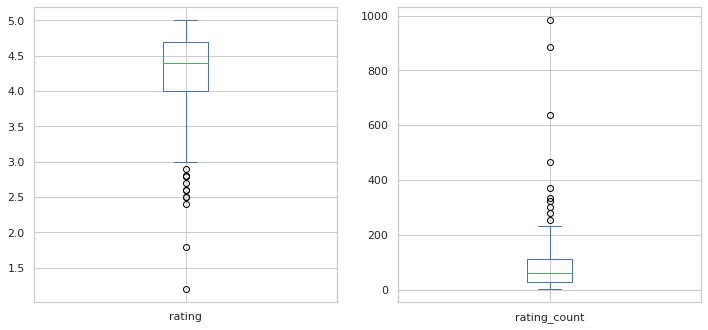

In [ ]:
#cek outliers
df_products.plot(kind="box", subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(25,25))
plt.show()

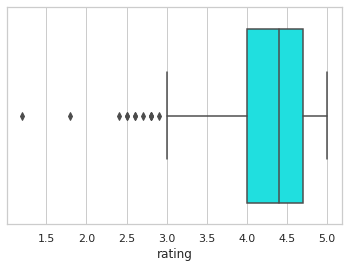

In [ ]:
rating = df_products["rating"]
colors = ['#00FFFF']

sns.boxplot(x=rating, palette=colors)
plt.show()

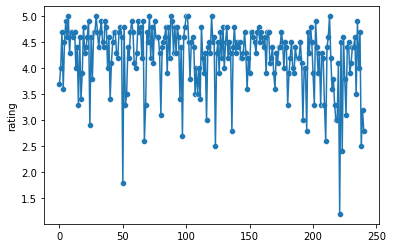

In [ ]:
sns.lineplot(data = df_products.rating)
sns.scatterplot(data = df_products.rating)

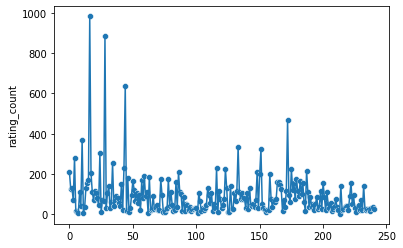

In [ ]:
sns.lineplot(data = df_products.rating_count)
sns.scatterplot(data = df_products.rating_count)

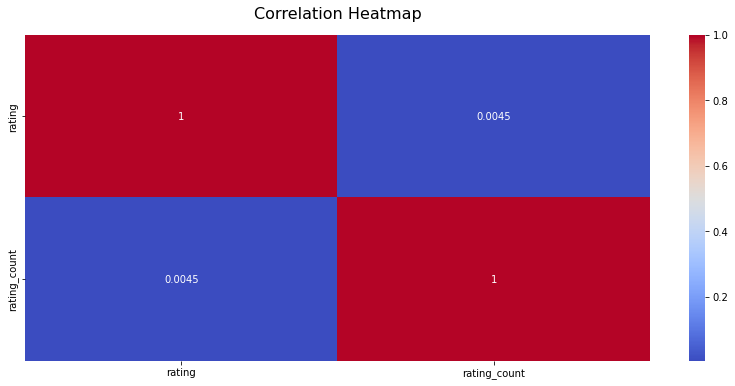

In [ ]:
plt.subplots(figsize=(14,6))
heatmap = sns.heatmap(df_products.corr(), annot=True, cmap='coolwarm')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 16}, pad=16)
plt.show()

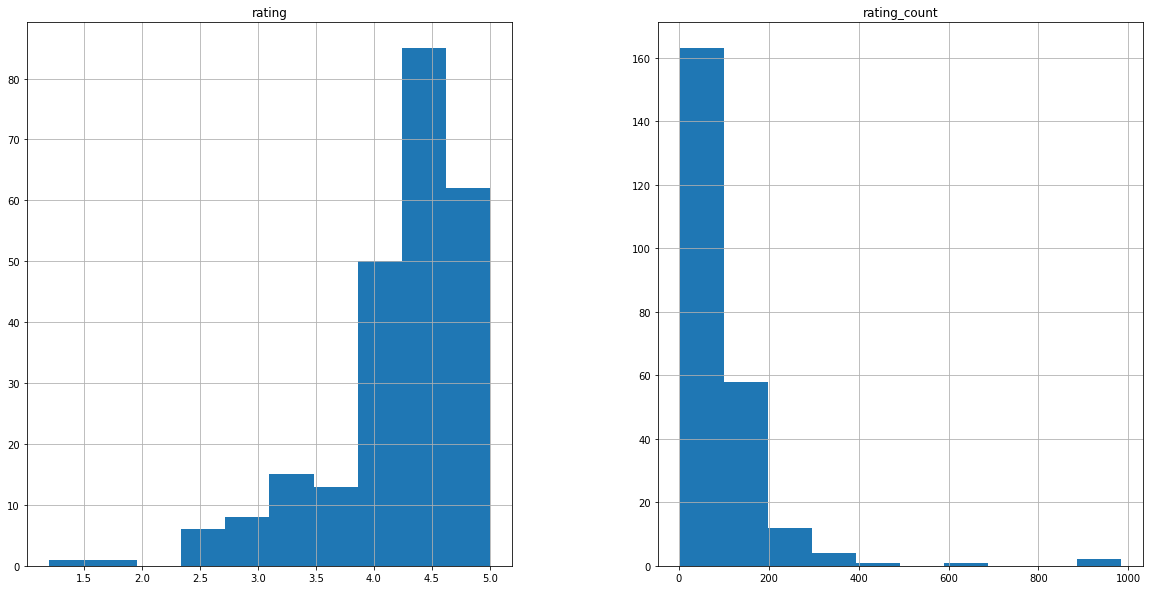

In [ ]:
df_products.hist(figsize=(20,10))
plt.show()

### Distribution of average rating

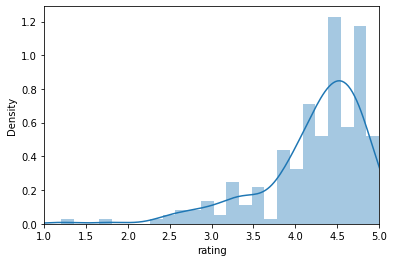

In [ ]:
sns.distplot(df_products["rating"], bins=25)
plt.xlim([1,5])
plt.show()

In [ ]:
df_products["rating"].describe()

count    241.000000
mean       4.223237
std        0.620383
min        1.200000
25%        4.000000
50%        4.400000
75%        4.700000
max        5.000000
Name: rating, dtype: float64

The reviews are generally very positive(median 4.4)

### Best and worst products by average rating

In [ ]:
# Best reviews
df_products[["name","rating","rating_count"]].sort_values("rating", ascending=False).head(10)

,name,rating,rating_count
120,Vanilla Caramel White Chocolate TRIO CRISPY LA...,5.0,32
7,Chocolate Peanut Butter Split,5.0,7
213,OREO® Snack Cups 10ct,5.0,2
101,Peppermint Bark Ice Cream Bar,5.0,8
88,Honey Salted Caramel Almond Ice Cream,5.0,103
71,Chocolate Fudge Non-Dairy Bar,5.0,22
29,Ice Cream Sammie,5.0,31
100,Peppermint Bark Ice Cream,5.0,31
33,New York Super Fudge Chunk®,4.9,63
235,Chocolate Snack Cups 10ct,4.9,26


Vanilla Caramel White Chocolate TRIO CRISPY LLAYERS and Chocolate Peanut Butter Split are the highest rated flavors (although they also have fewer reviews). Of the flavors with 70+ reviews we see Honey Salted Caramel Almond Ice Cream, New York Super Fudge Chunk®.

In [ ]:
# worst reviews
df_products[["name","rating","rating_count"]].sort_values("rating").head(10)

,name,rating,rating_count
221,Chocolate Chip Cookie Dough,1.2,89
50,Chocolate Chip Cookie Dough Core,1.8,166
223,Coffee,2.4,52
238,Layered Dessert S'mores,2.5,31
123,Vanilla Milk Chocolate Almond Ice Cream Bar,2.5,224
67,Chocolate Soft Dipped Ice Cream Bar,2.6,25
210,Butter Pecan,2.6,74
97,Peanut Butter Chip HEAVEN Light Ice Cream,2.7,25
240,Layered Dessert Brownie Cheesecake,2.8,25
195,CarbSmart™ Peanut Butter,2.8,88


Chocolate chip cooking dough core and Chocolate chip cooking dough core is the most disliked flavor by far. Also, "core" flavors tend to be disliked more often. Interestingly, disliked flavors have more reviews.

### Most reviewed products

In [ ]:
df_products[["name","rating","rating_count"]].sort_values("rating_count", ascending=False).head(10)

,name,rating,rating_count
16,Chocolate Chip Cookie Dough,4.6,983
28,Half Baked®,4.7,887
44,The Tonight Dough®,4.7,639
172,Natural Vanilla,4.1,467
10,Americone Dream®,4.7,370
133,CARAMEL COOKIE CRUNCH GELATO,4.2,334
151,MEDITERRANEAN MINT GELATO,4.7,324
24,Coffee Toffee Bar Crunch,2.9,302
4,Gimme S’more!™,4.5,281
34,Oat of This Swirled™,4.5,255


### Common and uncommon ingredients

In [ ]:
# Common ingredients

big_ingred_list = []
for ingred_list in df_products["ingredients"]:
    # we can't quite do:  big_ingred_list.extend(ingred_list.split(", "))
    # because there are commas within ingredients i.e.  "LIQUID SUGAR (SUGAR, WATER)" is 1 ingredient
    start = 0
    inside = False
    for i,char in enumerate(ingred_list):
        if char == "(":
            inside = True
        if char == ")":
            inside = False
        if not inside and char == ",":
            big_ingred_list.append(ingred_list[start:i].lstrip())
            start = i+1

ct = Counter(big_ingred_list)
most_common = ct.most_common(30)
most_common

[('SUGAR', 310),
 ('CREAM', 250),
 ('SALT', 202),
 ('SKIM MILK', 163),
 ('COCONUT OIL', 143),
 ('CORN SYRUP', 141),
 ('SOY LECITHIN', 140),
 ('NATURAL FLAVOR', 135),
 ('WATER', 131),
 ('EGG YOLKS', 124),
 ('MILK', 112),
 ('VANILLA EXTRACT', 99),
 ('GUAR GUM', 83),
 ('WHEAT FLOUR', 75),
 ('BAKING SODA', 66),
 ('WHEY', 62),
 ('VEGETABLE GUMS', 62),
 ('LIQUID SUGAR (SUGAR, WATER)', 57),
 ('PECTIN', 57),
 ('COCOA BUTTER', 56),
 ('CHOCOLATE', 54),
 ('MONO AND DIGLYCERIDES', 54),
 ('SOYBEAN OIL', 53),
 ('COCOA (PROCESSED WITH ALKALI)', 51),
 ('CAROB BEAN', 50),
 ('COCOA', 49),
 ('GUAR', 49),
 ('COCOA PROCESSED WITH ALKALI', 46),
 ('DEXTROSE', 46),
 ('CAROB BEAN GUM', 44)]

In [ ]:
# Uncommon ingredients

ct.most_common()[-20:]

[('ROASTED ALMONDS', 1),
 ('PLUM', 1),
 ('CHERRY AND BLACK CARROT CONCENTRATES (FOR COLOR)', 1),
 ('PLUM CONCENTRATE (FOR COLOR)', 1),
 ('CHERRY CONCENTRATE (FOR COLOR)', 1),
 ('BLACK CARROT CONCENTRATE (FOR COLOR)', 1),
 ('COCOA POWDER (PROCESSED WITH ALKALI)', 1),
 ('THIAMIN MONONITRATE (VITAMIN B1)', 1),
 ('FRUIT AND VEGETABLE JUICE (FOR COLOR)', 1),
 ('CHOCOLATE COOKIE PIECES', 1),
 ('ENRICHED FLOUR', 1),
 ('UNSWEETENED CHOCOLATE', 1),
 ('BAKING POWDER', 1),
 ('SODIUM ACID PYROPHOSPHATE', 1),
 ('MONOCALCIUM PHOSPHATE', 1),
 ('CREAM (MILK)', 1),
 ('THIAMIN MONONITRATE', 1),
 ('SKIM MILK POWDER', 1),
 ('SOY LECITHIN (EMULSIFIER)', 1),
 ('PASTEURIZED WHOLE EGGS', 1)]

In [ ]:
# Number of unique ingredients
len(ct)

437

### Unique ingredients in the top flavor

In [ ]:
# Unique ingredients in the top flavor
# gets the ingredients used in the top 10 highest rated recipes and "subtracts" any ingredients which are commonly used across all flavors (defined above).

top_flavor_ingreds = df_products.sort_values("rating", ascending=False)["ingredients"].head(10)
big_ingred_list2 = []
for ingred_list in top_flavor_ingreds:
    start = 0
    inside = False
    for i,char in enumerate(ingred_list):
        if char == "(":
            inside = True
        if char == ")":
            inside = False
        if not inside and char == ",":
            big_ingred_list2.append(ingred_list[start:i].lstrip())
            start = i+1

ct2 = Counter(big_ingred_list2)
[(ingred,count) for ingred,count in ct2.most_common() if ingred not in [i for i,x in most_common]]

[('SWEETENED CONDENSED MILK', 3),
 ('CONDENSED MILK', 3),
 ('NATURAL FLAVORS', 3),
 ('BUTTER', 2),
 ('HIGH FRUCTOSE CORN SYRUP', 2),
 ('SUNFLOWER OIL', 2),
 ('BUTTEROIL', 2),
 ('CARAMELIZED SUGAR', 1),
 ('SEA SALT', 1),
 ('NONFAT DRY MILK', 1),
 ('PEANUTS', 1),
 ('BANANA PUREE', 1),
 ('NONFAT MILK', 1),
 ('LEMON JUICE CONCENTRATE', 1),
 ('LIQUID SUGAR', 1),
 ('OREO COOKIE PIECES', 1),
 ('UNBLEACHED ENRICHED FLOUR', 1),
 ('NIACIN', 1),
 ('REDUCED IRON', 1),
 ('THIAMINE MONONITRATE (VITAMIN B1)', 1),
 ('RIBOFLAVIN (VITAMIN B2)', 1),
 ('FOLIC ACID', 1),
 ('AND/OR PALM OIL', 1),
 ('AND/OR CANOLA OIL', 1),
 ('LEAVENING', 1),
 ('AND/OR BAKING SODA', 1),
 ('AND/OR CALCIUM PHOSPHATE', 1),
 ('ARTIFICIAL FLAVOR', 1),
 ('PROPYLENE GLYCOL MONOESTERS', 1),
 ('VEGETABLE GUM (GUAR)', 1),
 ('CELLULOSE GUM', 1),
 ('CARRAGEENAN', 1),
 ('WHITE CHOCOLATE ICE CREAM: CREAM', 1),
 ('COCOA BUTTER. DARK CHOCOLATE AND VEGETABLE OIL COATING WITH PEPPERMINT CANDY PIECES: DARK CHOCOLATE (SUGAR, CHOCOLATE, SOY LECI

We see SWEETENED CONDENSED MILK, CONDENSED MILK, NATURAL FLAVORS appear in three of the top 10 flavors. BUTTER, HIGH FRUCTOSE CORN SYRUP, SUNFLOWER OIL, BUTTEROIL also appear in two.

## Set Up WordCloud DF PRODUCTS


In [ ]:
print("There are {} observations and {} features in this dataset. \n".format(df_products.shape[0],df_products.shape[1]))

print("There are {} types of wine in this dataset such as {}... \n".format(len(df_products.description.unique()), 
                                                                           ", ".join(df_products.description.unique()[0:5])))

print("There are {} countries producing wine in this dataset such as {}... \n".format(len(df_products.name.unique()), 
                                                                                      ", ".join(df_products.name.unique()[0:5])))

There are 241 observations and 8 features in this dataset. 

There are 238 types of wine in this dataset such as Find your way to the ultimate ice cream experience with our Cores. Whether your primal urges lead you to the center of salted caramel or directly to the blonde brownies, you’ll be in total control of your own ice cream destiny., There’s something for everyone to watch on Netflix & flavors for everyone to enjoy from Ben & Jerry’s, so we’ve teamed up to bring you a chillaxing new creation that’s certain to satisfy any sweet or salty snack craving. It’s a flavorful world, and everyone is invited to grab a spoon., Sometimes “chip” happens and everything’s a mess, but we Nailed It! with this chip-filled limited batch. When smooth chocolate ice cream meets fudge chips & salty swirls, they pack a serious one-two crunch. The best part? There won’t be anything left to clean up., As a Limited Batch that captured the rapture of the classic Sicilian dessert, our Cannoli captivated fans 

In [ ]:
?WordCloud

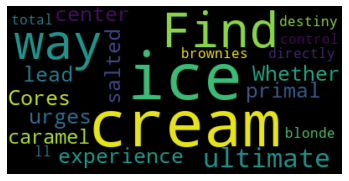

In [ ]:
# Start with one review:
text = df_products.description[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
wc = WordCloud(background_color="white", max_words=2000,
               max_font_size=256,
               random_state=42, width=500, height=500)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

the first review mentioned a lot about cream, Find, ice, ultimate, way of the products.

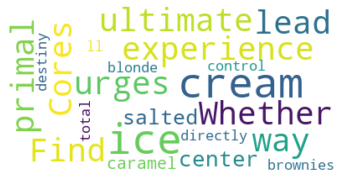

In [ ]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

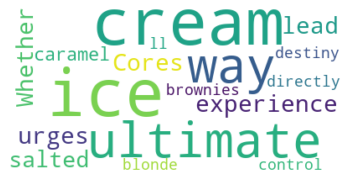

In [ ]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["primal", "total", "find", "center"])

# # Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# # Display the generated image:
# # the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
cream_mask = np.array(Image.open("cream.png"))
cream_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [ ]:
# Transform your mask into a new one that will work with the function:
transformed_cream_mask = np.ndarray((cream_mask.shape[0],cream_mask.shape[1]), np.int32)

for i in range(len(cream_mask)):
    transformed_cream_mask[i] = list(map(transform_format, cream_mask[i]))

In [ ]:
# Check the expected result of your mask
transformed_cream_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=int32)

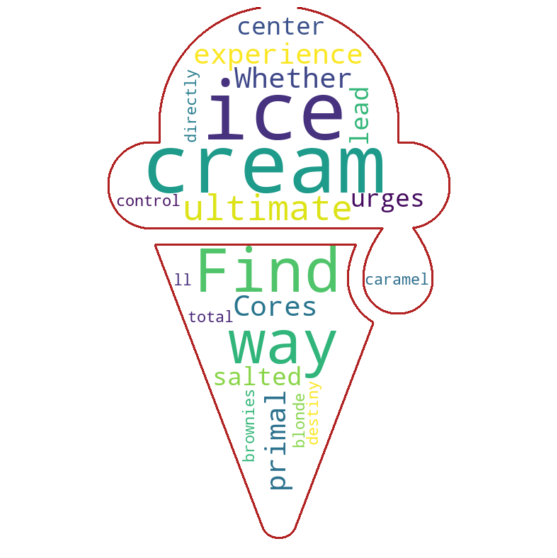

In [ ]:
stopwords = set(STOPWORDS)

# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_cream_mask,
               stopwords=stopwords, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("cream.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
wc.to_file("IceCreamProducts.png")
plt.show()

a wordcloud in the shape of a ice cream ! It seems like cream descriptions most often mention about cream, Find, ice, ultimate, and way characteristics of the ice cream.

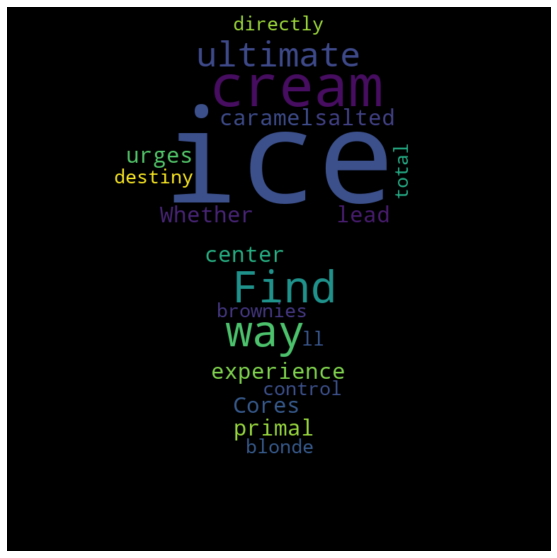

In [ ]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

mask = np.array(Image.open('cream.png'))
wc = WordCloud(stopwords=STOPWORDS,
               mask=transformed_cream_mask, background_color="black",
               max_words=2000, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0])
wc.generate(text)
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

### Creating wordcloud following a color pattern

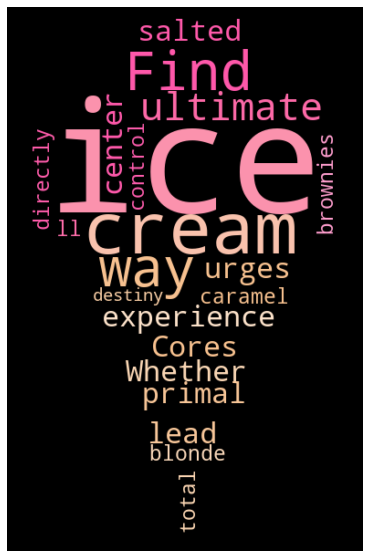

In [ ]:
wordcloud = WordCloud().generate(text)

creamcrop_mask = np.array(Image.open('creamcrop.png'))
colormap = ImageColorGenerator(creamcrop_mask)

wc = WordCloud(stopwords=STOPWORDS,
               mask=creamcrop_mask, 
               background_color="black",
               contour_color="white",
               max_words=2000, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0])

wc.generate(text)
wc.recolor(color_func=colormap)
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
# store to file
plt.savefig("CreamCropProducts.png", format="png")
plt.show()

# DF_Reviews

In [ ]:
df_reviews = pd.read_csv('reviewsCombined.csv')
df_reviews.head()

,brand,key,author,date,stars,title,helpful_yes,helpful_no,text,taste,ingredients,texture,likes
0,bj,0_bj,Ilovebennjerry,2017-04-15,3,Not enough brownies!,10.0,3.0,"Super good, don't get me wrong. But I came for...",NaN,NaN,NaN,NaN
1,bj,0_bj,Sweettooth909,2020-01-05,5,I’m OBSESSED with this pint!,3.0,0.0,I decided to try it out although I’m not a hug...,NaN,NaN,NaN,NaN
2,bj,0_bj,LaTanga71,2018-04-26,3,My favorite...More Caramel Please,5.0,2.0,My caramel core begins to disappear about half...,NaN,NaN,NaN,NaN
3,bj,0_bj,chicago220,2018-01-14,5,Obsessed!!!,24.0,1.0,Why are people complaining about the blonde br...,NaN,NaN,NaN,NaN
4,bj,0_bj,Kassidyk,2020-07-24,1,Worst Ice Cream Ever!,1.0,5.0,This ice cream is worst ice cream I’ve ever ta...,NaN,NaN,NaN,NaN


In [ ]:
df_reviews.shape

(21674, 13)

## visualization

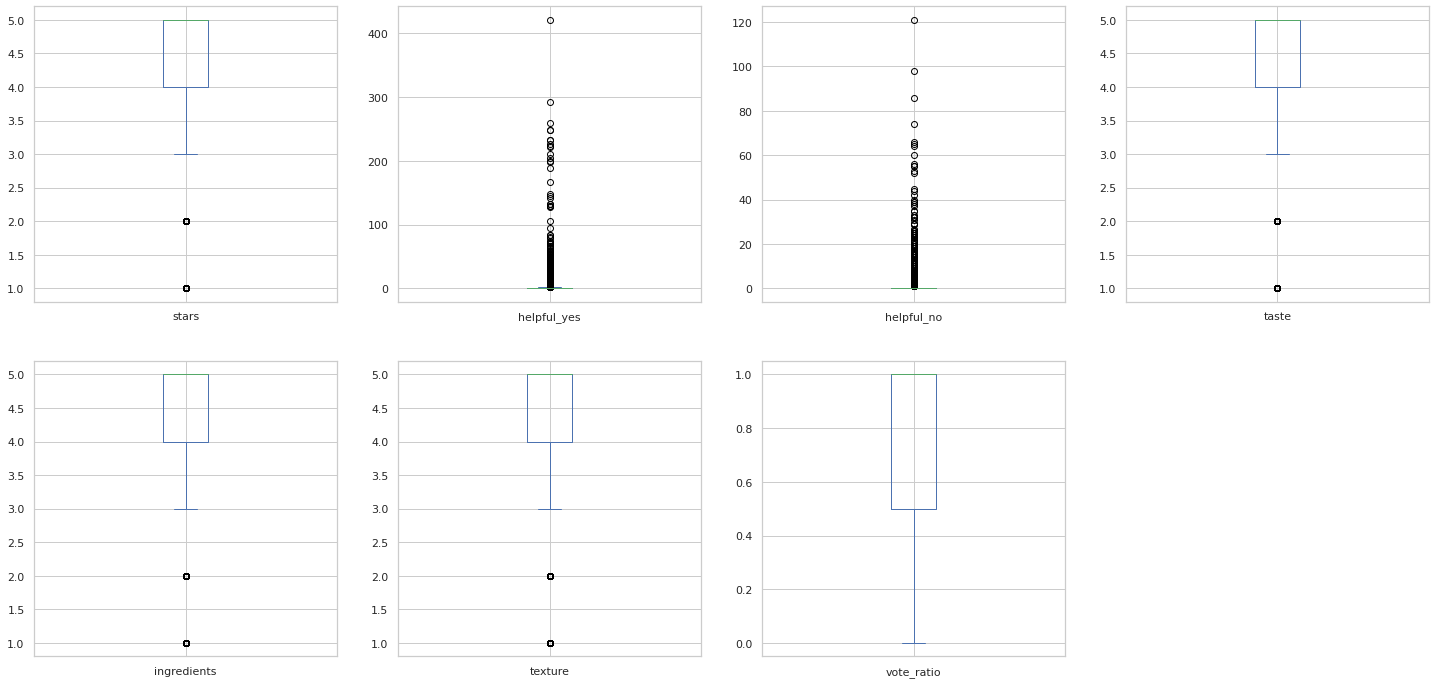

In [ ]:
#cek outliers
df_reviews.plot(kind="box", subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(25,25))
plt.show()

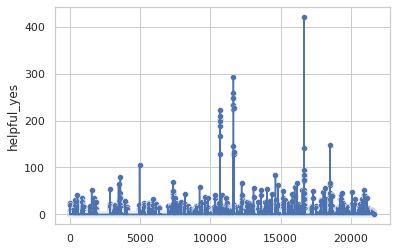

In [ ]:
sns.lineplot(data = df_reviews.helpful_yes)
sns.scatterplot(data = df_reviews.helpful_yes)

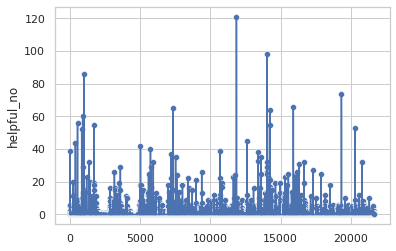

In [ ]:
sns.lineplot(data = df_reviews.helpful_no)
sns.scatterplot(data = df_reviews.helpful_no)

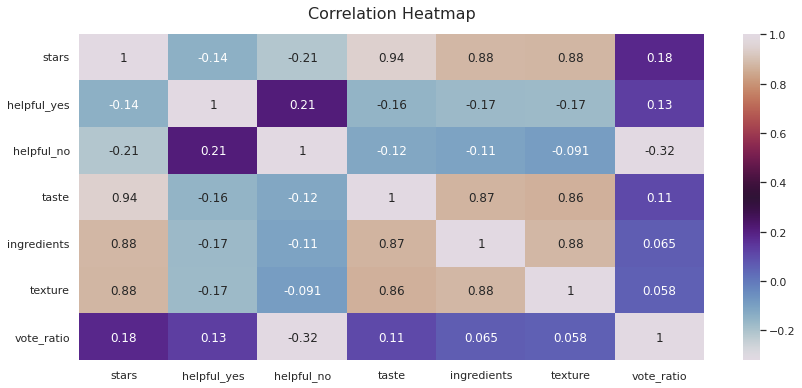

In [ ]:
plt.subplots(figsize=(14,6))
heatmap = sns.heatmap(df_reviews.corr(), annot=True, cmap='twilight')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 16}, pad=16)
plt.show()

Based on the Correlation Heatmap, the strong correlation is taste with texture, ingredients with texture, taste with ingredients, texture with stars, ingredients with stars. and there is also a weak correlation, namely helpful_no with ingredients, helpful_no with taste, taste with helpful_yes, helpful_yes with stars.

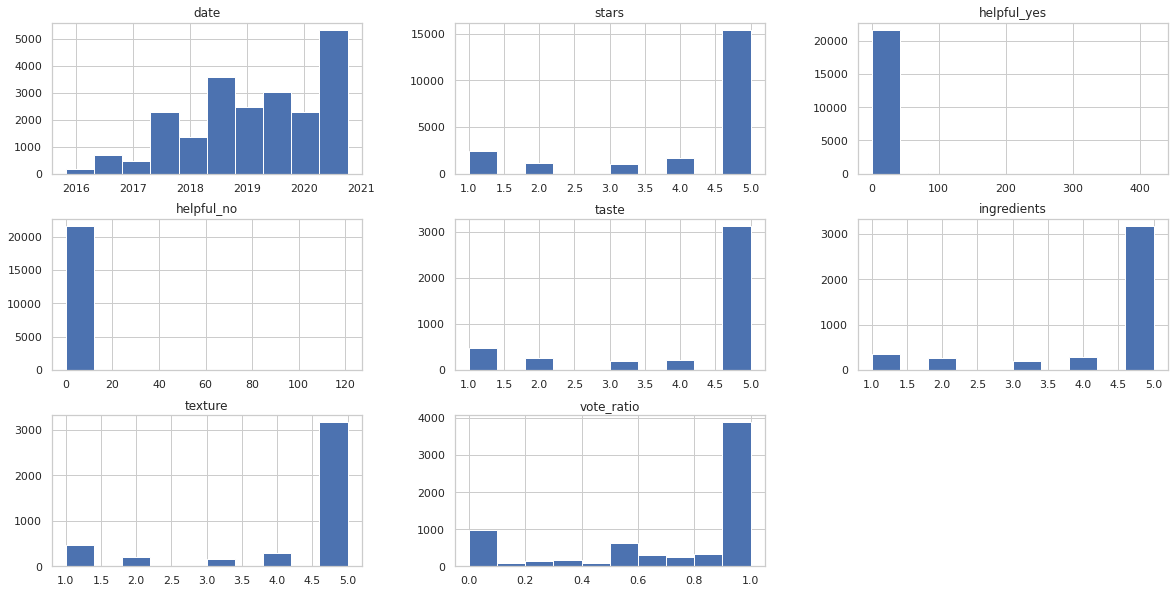

In [ ]:
df_reviews.hist(figsize=(20,10))
plt.show()

### Review dates

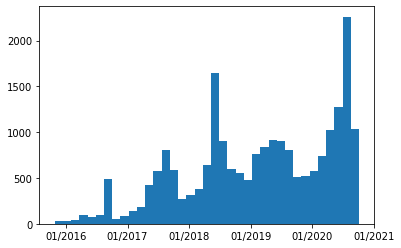

In [ ]:
df_reviews["date"] = pd.to_datetime(df_reviews["date"], format="%Y-%m-%d")
mpl_data = mdates.date2num(df_reviews["date"])
plt.hist(mpl_data, bins="auto")
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
plt.show()

### Helpfulness of reviews

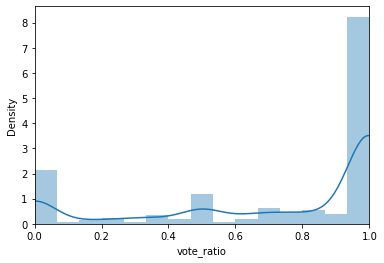

In [ ]:
sum_votes = df_reviews[["helpful_yes","helpful_no"]].sum(axis=1) # sum yes & no votes for each review
has_votes = sum_votes > 0 # reviews with votes
df_reviews["vote_ratio"] = df_reviews.loc[has_votes,"helpful_yes"].div(sum_votes)
sns.distplot(df_reviews["vote_ratio"], bins=15)
plt.xlim([0,1])
plt.show()

## Set Up WordCloud DF REVIEWS

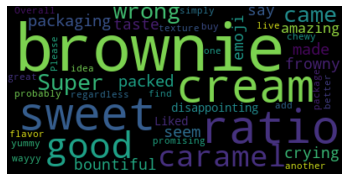

In [ ]:
# Start with one review:
text = df_reviews.text[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
wc = WordCloud(background_color="white", max_words=2000,
               max_font_size=256,
               random_state=42, width=500, height=500)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

the first review mentioned a lot about Brownie, cream, sweet, good, caramel,ratio of the reviews.

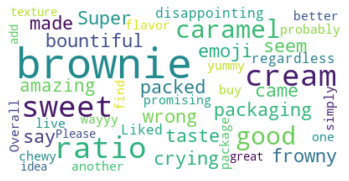

In [ ]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
creamm_mask = np.array(Image.open("cream2.png"))
creamm_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [ ]:
# Transform your mask into a new one that will work with the function:
transformed_creamm_mask = np.ndarray((creamm_mask.shape[0],creamm_mask.shape[1]), np.int32)

for i in range(len(creamm_mask)):
    transformed_creamm_mask[i] = list(map(transform_format, creamm_mask[i]))

In [ ]:
# Check the expected result of your mask
transformed_creamm_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=int32)

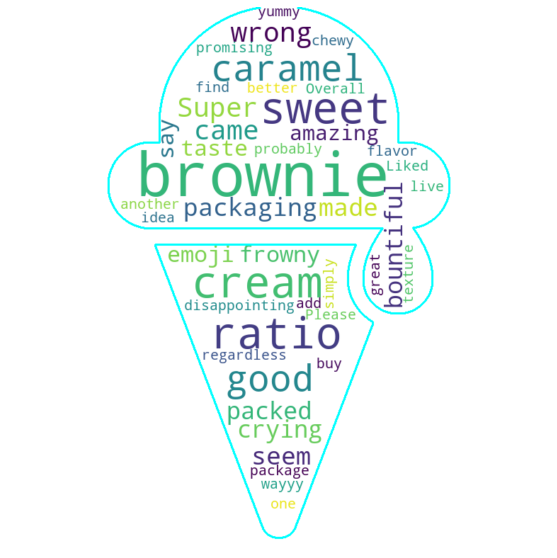

In [ ]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_creamm_mask,
              contour_width=3, contour_color='cyan')

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("cream2.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

a wordcloud in the shape of a ice cream ! It seems like cream descriptions most often mention about Brownie, cream, sweet, good, caramel,and ratio characteristics of the ice cream

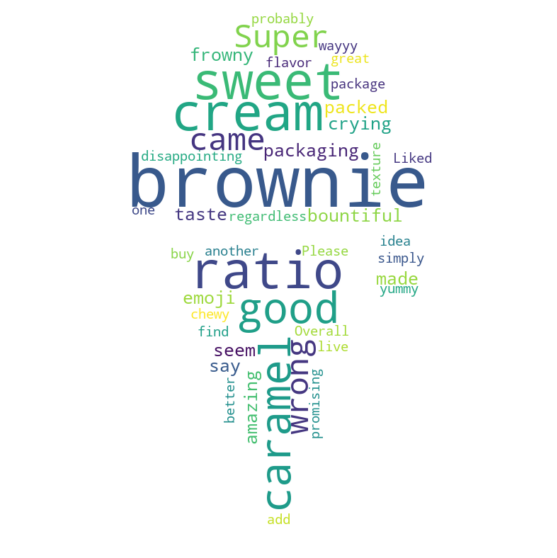

In [ ]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

mask = np.array(Image.open('cream2.png'))
wc = WordCloud(mask=transformed_creamm_mask,
               background_color="white",
               max_words=2000, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0])
wc.generate(text)
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
wc.to_file("IceCreamReviews.png")

plt.show()

### Creating wordcloud following a color pattern

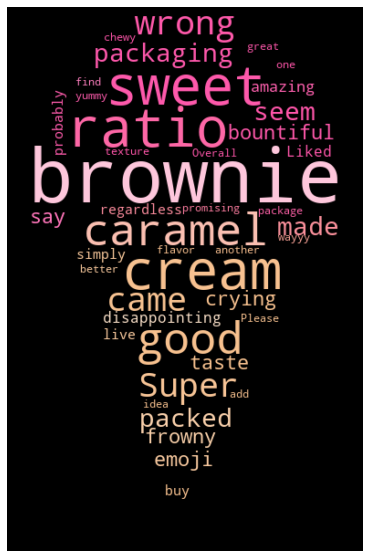

In [ ]:
wordcloud = WordCloud().generate(text)

creamcrop_mask = np.array(Image.open('creamcrop.png'))
colormap = ImageColorGenerator(creamcrop_mask)

wc = WordCloud(mask=creamcrop_mask, 
               background_color="black",
               contour_color="white",
               max_words=2000, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0])

wc.generate(text)
wc.recolor(color_func=colormap)
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')

# store to file
plt.savefig("CreamCropReviews.png", format="png")

plt.show()